<a href="https://colab.research.google.com/github/MrKeeplearning/dap-course/blob/main/lecture/Ch7_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Time-Series

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7),
                     'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/'+
                 'selva86/datasets/master/a10.csv',
                 parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [2]:
df.date[0]

Timestamp('1991-07-01 00:00:00')

In [3]:
print(df.date[0].year)
print(df.date[0].month)
print(df.date[0].day)

1991
7
1


## Visualizing a Time-Series

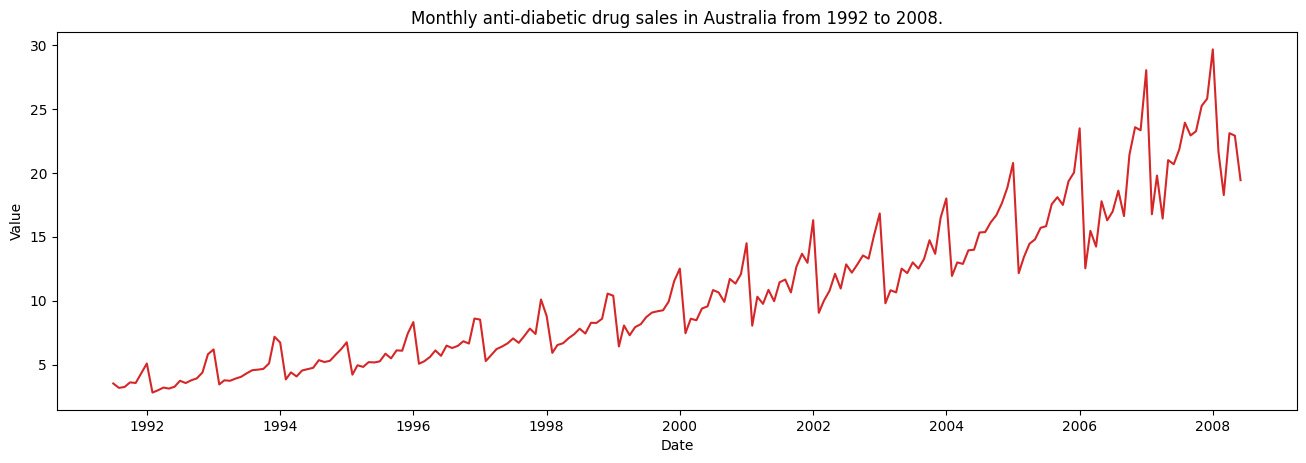

In [4]:
# Time series data source: fpp package in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
  plt.figure(figsize=(16,5), dpi=dpi)
  plt.plot(x, y, color='tab:red')
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.show()

plot_df(df, x=df.index, y=df.value,
        title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [5]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


## Seasonal Plot

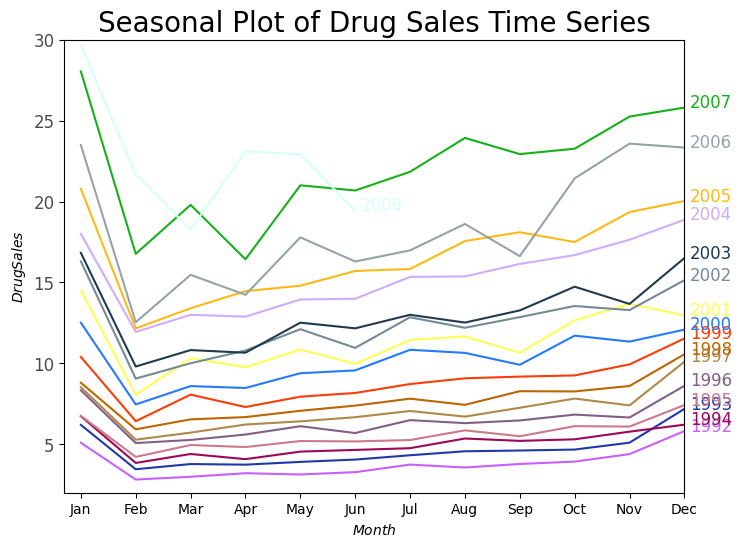

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years), replace=False)

# Draw Plot
plt.figure(figsize=(8,6), dpi=100)
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'value', data=df.loc[df.year==y, :],
             color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9,
             df.loc[df.year==y, 'value'][-1:].values[0],
             y, fontsize=12, color=mycolors[i])
    
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [7]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


## Boxplot of Time-Series

◼ Month-wise (Seasonal) and Year-wise (trend) Distribution

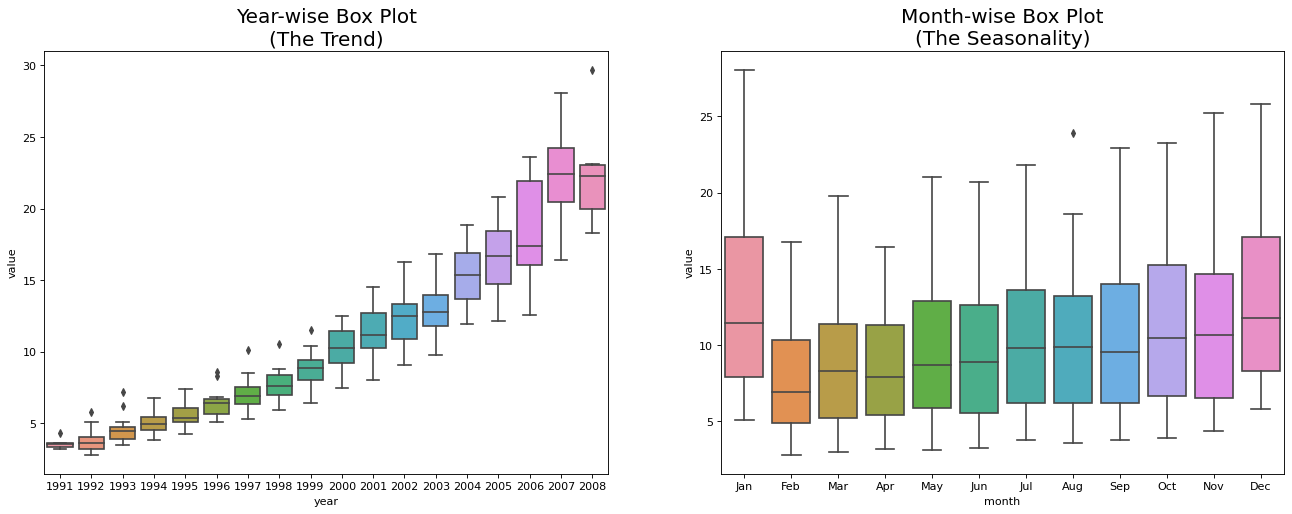

In [8]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## Decomposition of Time-Series

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


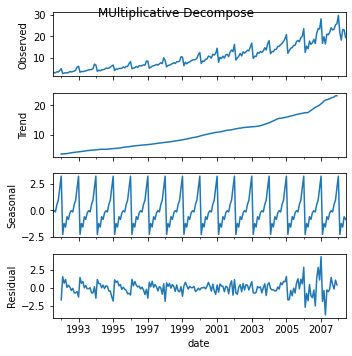

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'], index_col='date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'])

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('MUltiplicative Decompose')
plt.show()

## Missing Values in a Time-Series

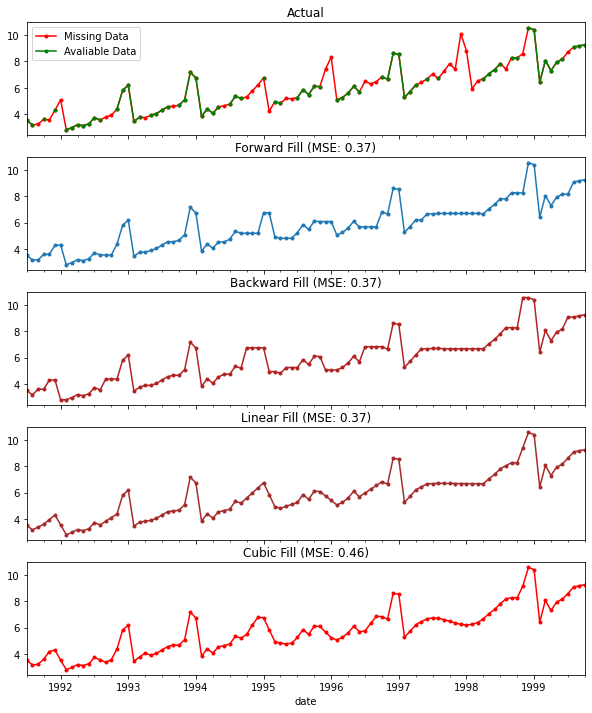

In [10]:
## Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
path = 'https://raw.githubusercontent.com/selva86/datasets/master/'
df_orig = pd.read_csv(path + 'a10.csv',
                      parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv(path + 'a10_missings.csv',
                 parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Avaliable Data"])

## 2. Forward Fill
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1],
                       label='Forward Fill', style=".-")

## 3. Backward Fill
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_bfill['value'].plot(title='Backward Fill (MSE: ' + str(error) +")", ax=axes[2],
                       label='Backward Fill', color='firebrick', style=".-")

## 4. Linear Interpolation
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) + ")",
                       ax = axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")",
                      ax=axes[4], label='Cubic Fill', color='red', style=".-")

## Smoothing a Time-Series

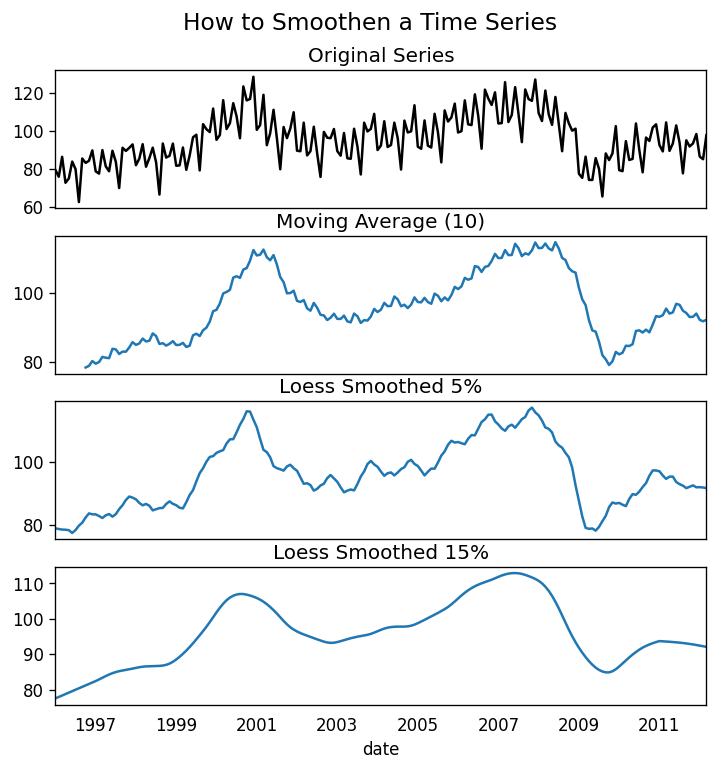

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv(path + 'elecequip.csv',
                      parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(10).mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(
    lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1],
    index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(
    lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1],
    index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4, 1, figsize=(7,7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_ma.plot(ax=axes[1], title='Moving Average (10)')
df_loess_5['value'].plot(ax=axes[2], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[3], title='Loess Smoothed 15%')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()